# K nearest neighbors
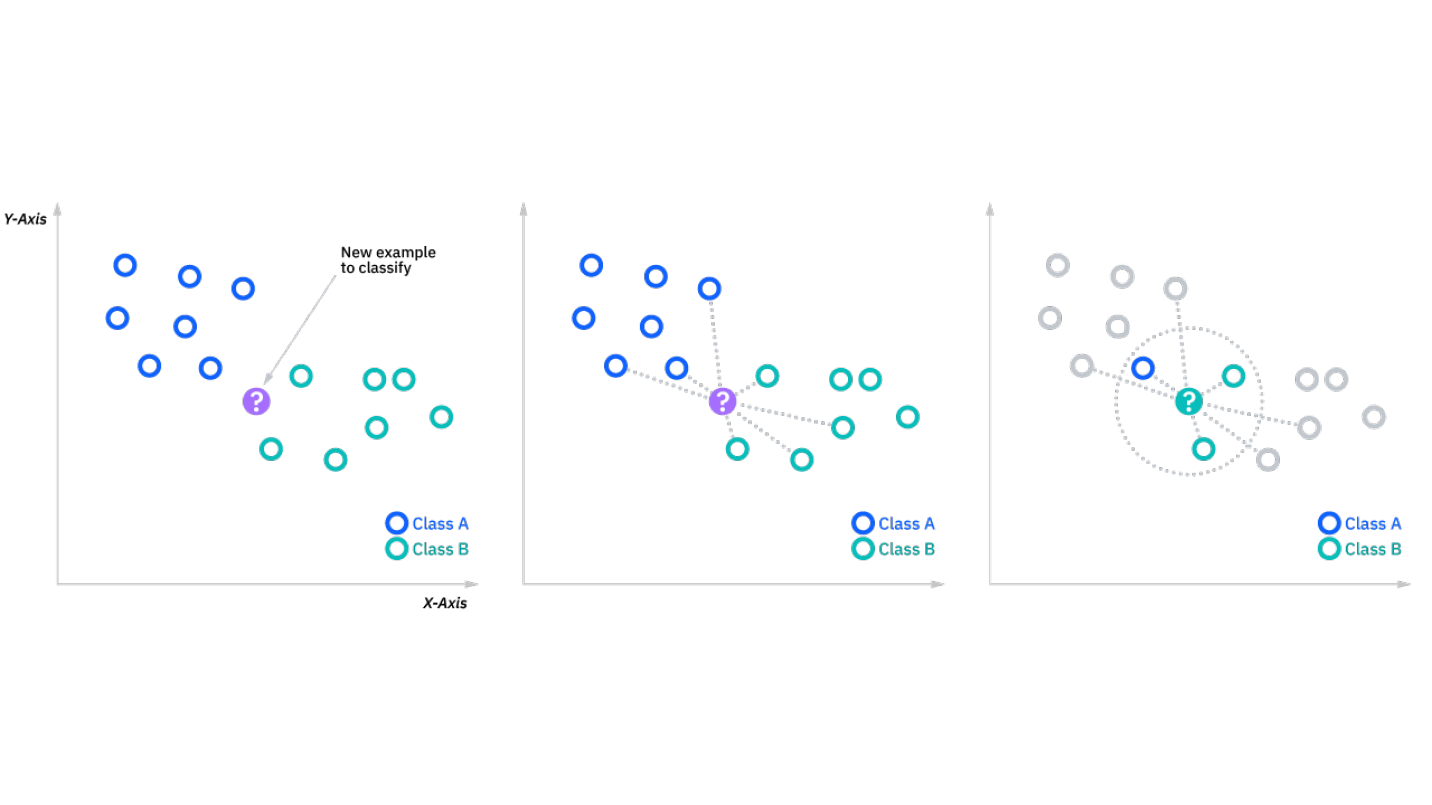

# Overview

K-nearest neighbor (KNN) is an algorithm used for classification and regression tasks in machine learning. The main idea behind KNN is to classify or predict the value of a new data point based on the k-nearest data points in the training set.

Given a new data point, the KNN algorithm finds the k-nearest neighbors in the training set based on a distance metric (usually Euclidean distance). For classification tasks, the algorithm assigns the new data point to the class that is most frequent among its k-nearest neighbors. For regression tasks, the algorithm assigns the new data point the average value of its k-nearest neighbors. The KNN algorithm does not require any training process, as it simply stores the training data and uses it for classification or prediction at runtime.

# Advantage

1. Simple and intuitive algorithm that is easy to understand and implement.
2. Can be used for both classification and regression tasks.
3. Does not require any training process, which makes it very fast and efficient for small datasets.

# Disadvantage

1. Computationally expensive for large datasets, as it requires calculating the distance between each new data point and all training data points.
2. Does not work well with high-dimensional data. 
3. Can be sensitive to the choice of distance metric and the value of k.

# Data
The Palmer penguins dataset is a collection of data on three different species of penguins, namely Adelie, Chinstrap, and Gentoo, collected on three islands in the Palmer Archipelago, Antarctica. The dataset contains various physical measurements of penguins, including culmen length, culmen depth, flipper length, and body mass, as well as information on the sex and age of each penguin.

The dataset is used for machine learning tasks liek classification, where the goal is to predict the penguin class based on its characteristics.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


In this analysis, we will explore the relationship between two key features of penguins, their bill length and bill depth, and how these features can be used to differentiate between penguins. By visualizing the relationship between these features, we can gain a deeper understanding of how they may be useful in classifying category of penguin.

[Text(0.5, 0, 'Bill length'), Text(0, 0.5, 'Bill depth')]

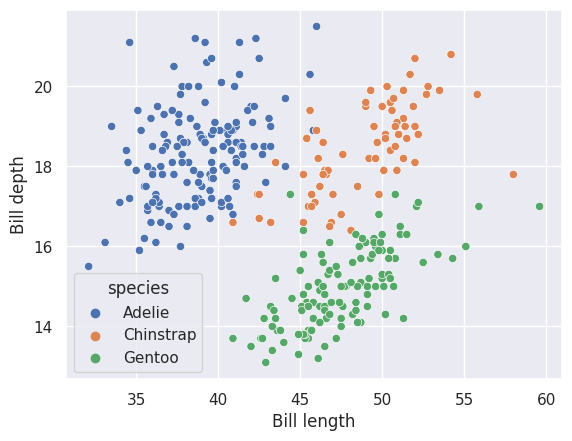

In [3]:
sns.set_theme() 
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = df["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species").set( 
                                        xlabel='Bill length', 
                                        ylabel='Bill depth')

We create a Python class for the k means clustering that stores the k value, the Euclidean distance, and classfication errors. The Euclidean distance is a common distance metric used in k-means clustering to measure the similarity or dissimilarity between data points. The Euclidean distance between two points in a multidimensional space is the square root of the sum of the squared differences between the corresponding coordinates of the two points.

In [4]:
class KNN(object):
    def __init__(self, k=3):
        self.k = k
        
    def distance(self, p, q):
        return (p - q) @ (p - q)
    
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, point, regression=False):
        neighbors = []  
        for i, xi in enumerate(self.X_train):
            di = self.distance(point, xi)
            neighbors.append((i, di))
        neighbors = sorted(neighbors, key=lambda x: x[1])
        k_neighbors = [neighbors[i][0] for i in range(self.k)]
        labels = [self.y_train[x] for x in k_neighbors]
        if regression == True:
            return sum(x for x in labels) / self.k
        else:
            return max(labels)
        
    def classification_error(self, X_test, y_test):
        error = 0
        for i, point in enumerate(X_test):
            pred_label = self.predict(point)
            if pred_label != y_test[i]:
                error = error + 1
        return error/len(X_test)

We create an instance of the K means clustering class and train this instance. We also test predicting one data point.

In [5]:
knn = KNN(k = 5)
knn.train(X_train, y_train)
# Predict one data point
print(knn.predict(X_test[0]))
# Actual label is
print(y_test[0])

Adelie
Adelie


We can check the error of our model, which is 0.1, means that our model can classify accurately 90% of our data.

In [6]:
knn.classification_error(X_test, y_test)

0.1

We can test a range of k values to find the optimal parameter for our model.

[Text(0.5, 1.0, 'Errors over neighbors'),
 Text(0.5, 0, 'Number of K neighbors'),
 Text(0, 0.5, '% Errors')]

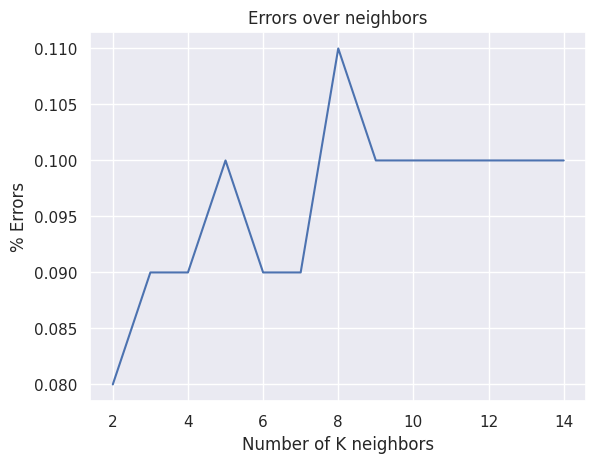

In [7]:
possible_K = [k for k in range(2, 15, 1)]
errors_ = []
for ki in possible_K:
    knn = KNN(k = ki)
    knn.train(X_train, y_train)
    error = knn.classification_error(X_test, y_test)
    errors_.append(error)

sns.lineplot(x=possible_K, y=errors_).set(title='Errors over neighbors', 
                                         xlabel='Number of K neighbors', 
                                         ylabel='% Errors')

As our K increases, our errors increases, and k =2 is the optimal paramter. We can try scale our data to see if it makes a difference in our model performance.

[Text(0.5, 1.0, 'Errors over neighbors'),
 Text(0.5, 0, 'Number of K neighbors'),
 Text(0, 0.5, '% Errors')]

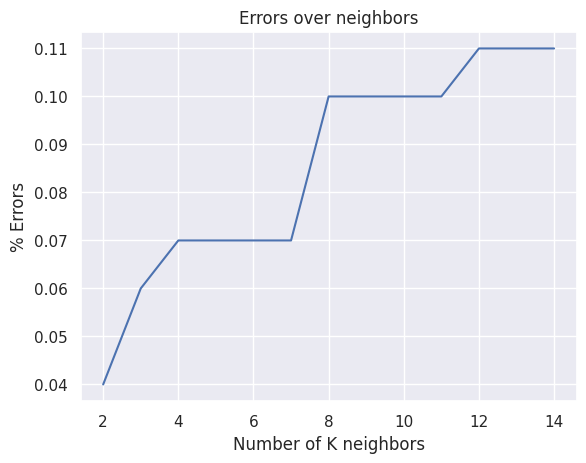

In [8]:
for i in range(0, X.shape[1]):
    X[:,i] = preprocessing.scale(X[:,i])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
possible_K = [k for k in range(2, 15, 1)]
errors_ = []
for ki in possible_K:
    knn = KNN(k = ki)
    knn.train(X_train, y_train)
    error = knn.classification_error(X_test, y_test)
    errors_.append(error)

sns.lineplot(x=possible_K, y=errors_).set(title='Errors over neighbors', 
                                         xlabel='Number of K neighbors', 
                                         ylabel='% Errors')

# Steam game recommendation
It seems like scaling also does not work. 
We can repurpose our K-Nearest Neighbor model for a different task, such as recommending games to users based on their similarity to other users. Instead of classifying data labels, the model can utilize similarity scores between users to recommend games that similar users have enjoyed. 

In [24]:
games = pd.read_csv("steam_games.csv")
games = games.dropna()
games.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
6,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...",$59.99,$70.42
37,https://store.steampowered.com/app/532210/Life...,app,Life is Strange 2,"After a tragic incident, brothers Sean and Dan...","Mostly Positive,(155),- 72% of the 155 user re...","Very Positive,(4,437),*,- 86% of the 4,437 use...","Sep 26, 2018",DONTNOD Entertainment,"Square Enix,Square Enix","Choices Matter,Story Rich,Adventure,Great Soun...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",46.0,Adventure,About This Game Purchase the Complete Season...,Mature Content Description The developers de...,"Minimum:,OS:,Windows 7 or above (64-bit Operat...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$7.99,$39.95
75,https://store.steampowered.com/app/476600/Call...,app,Call of Duty®: WWII,Call of Duty® returns to its roots with Call o...,"Mixed,(66),- 53% of the 66 user reviews in the...","Mixed,(12,703),- 54% of the 12,703 user review...","Nov 2, 2017","Sledgehammer Games,Raven Software","Activision,Activision","World War II,FPS,Multiplayer,War,Action,Zombie...","Single-player,Multi-player,Online Multi-Player...","English,French,Italian,German,Spanish - Spain,...",35.0,Action,About This Game Includes Digital Edition Bon...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",1.020,$906.48
94,https://store.steampowered.com/app/418240/Shad...,app,Shadow Tactics: Blades of the Shogun,Shadow Tactics is a hardcore tactical stealth ...,"Very Positive,(124),- 94% of the 124 user revi...","Overwhelmingly Positive,(7,238),- 95% of the 7...","Dec 6, 2016",Mimimi Productions,"Daedalic Entertainment,Daedalic Entertainment","Stealth,Tactical,Ninja,Strategy,Real Time Tact...","Single-player,Steam Achievements,Full controll...","English,French,German,Spanish - Spain,Japanese...",44.0,"Indie,Strategy",About This Game Shadow Tactics is a hardcore...,Mature Content Description The developers de...,"Minimum:,OS:,Windows Vista 64-bit,Processor:,I...","Recommended:,OS:,Windows 7 64-bit or higher, W...",$39.99,$13.59
153,https://store.steampowered.com/app/513710/SCUM/,app,SCUM,SCUM aims to evolve the multiplayer open world...,"Mixed,(346),- 58% of the 346 user reviews in t...","Mixed,(22,177),- 64% of the 22,177 user review...","Aug 29, 2018","Gamepires,Croteam","Devolver Digital,Devolver Digital","Early Access,Survival,Open World,Multiplayer,Z...","Single-player,Multi-player,Online Multi-Player...","English,German,Russian,Simplified Chinese,Fren...",56.0,"Action,Adventure,Indie,Massively Multiplayer,E...",About This Game The world’s unquenchable need...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$19.99,$28.48


We can process the game data select only for genre for our recommendation. We then visualize the genre of one randomly chosen game.

In [25]:
games.set_index("name", drop = False, inplace = True)
game_name = games[["name"]]
games = games[["name", "genre"]]
# Split into genre
genre = list(set([item for record in games["genre"] for item in record.split(',')]))

# Set 1 if the game has that genere, otherwise leave as 0
games[genre] = 0
for i in range(0, len(games)):
    game_genre = games["genre"][i].split(',')
    for j in game_genre:
        games[j][i] = 1

games = games.loc[:, games.columns!='genre']
# Check one game
games.loc["Outlast"]

name                     Outlast
Free to Play                   0
RPG                            0
Casual                         0
Early Access                   0
Action                         1
Strategy                       0
Simulation                     0
Massively Multiplayer          0
Adventure                      1
Indie                          1
Name: Outlast, dtype: object

We can develop a function that recommends similar games to a given game  by utilizing the nearest neighbors to the given feature vector. We can utilize the function we have previously written above to find the k-nearest neighbors to the given game feature vector.

In [27]:
X = games.loc[:, games.columns!='name'].to_numpy()
y = game_name.to_numpy()

def distance(p, q):
    return (p - q) @ (p - q)

def game_recommendation(game_name, games, X, y, k = 4):
    point =games.loc[:, games.columns!='name'].loc[game_name].to_numpy()
    neighbors = []  
    for i, xi in enumerate(X):
        di = distance(point, xi)
        neighbors.append((i, di))
    neighbors = sorted(neighbors, key=lambda x: x[1])
    k_neighbors = [neighbors[i][0] for i in range(k)]
    labels = [y[x] for x in k_neighbors]
    return labels[1:]

We can recommend games similar to the game Outlast, is a survival horror video game.

In [28]:
game_recommendation("Outlast", games, X, y)

[array(['Outlast 2'], dtype=object),
 array(['Lucius'], dtype=object),
 array(['We Happy Few'], dtype=object)]

Both Lucius and We Happy Few are survival horror game similar to Outlast, so our horror-survival-enjoyer gamers would be very happy with these recommendations. We can check the genre assigned to this game to quantify our similar they are.

In [29]:
game1 = games.loc[games['name'] == "Outlast"]
game2 = games.loc[games['name'] == "'Outlast 2"]
game3 = games.loc[games['name'] == "Lucius"]
game4 = games.loc[games['name'] == "We Happy Few"]
compare = [game1, game2, game3, game4]
compare = pd.concat(compare)
compare.T

name,Outlast,Lucius,We Happy Few
name,Outlast,Lucius,We Happy Few
Free to Play,0,0,0
RPG,0,0,0
Casual,0,0,0
Early Access,0,0,0
Action,1,1,1
Strategy,0,0,0
Simulation,0,0,0
Massively Multiplayer,0,0,0
Adventure,1,1,1


All 3 games are lables as adventure, indie and action. We test our recommender on other games as well, for example, mafia, whichis a gangster-themed shooting game.

In [31]:
game_recommendation("Mafia III", games, X, y)

game1 = games.loc[games['name'] == "Mafia III"]
game2 = games.loc[games['name'] == "Grand Theft Auto V"]
game3 = games.loc[games['name'] == "Sunset Overdrive"]
game4 = games.loc[games['name'] == "Saints Row IV"]
compare = [game1, game2, game3, game4]
compare = pd.concat(compare)
compare.T

name,Mafia III,Grand Theft Auto V,Sunset Overdrive,Saints Row IV
name,Mafia III,Grand Theft Auto V,Sunset Overdrive,Saints Row IV
Free to Play,0,0,0,0
RPG,0,0,0,0
Casual,0,0,0,0
Early Access,0,0,0,0
Action,1,1,1,1
Strategy,0,0,0,0
Simulation,0,0,0,0
Massively Multiplayer,0,0,0,0
Adventure,1,1,1,1


# Conclusion
Again, games like Saint Row and GTA V are also gangster-themed shoot game, showing how powerful our k nearest neighbor recommendation system is. Beside basing on the genre like we do here, the KNN algorithm can also make a recommendation by taking the average rating or preference of the K nearest neighbors and using that as the predicted rating or preference for the given game. Other items such as movies and books can also be recommended using KNN.